In [273]:
def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

In [274]:
import numpy as np
#sigmoid函数
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

In [275]:
#求梯度d=X(A-Y)'
def gradAscent(dataMat,classLabels):
    dataMatrix=np.mat(dataMat)
    labelMatrix=np.mat(classLabels).transpose()
    m,n=dataMatrix.shape
    weight=np.ones((n,1))
    trainrate=0.001
    iternum=500
    for num in range(iternum):
        L=sigmoid(np.dot(dataMatrix,weight))
        cost=labelMatrix-L
        weight=weight+trainrate*dataMatrix.transpose()*cost
    return weight

In [287]:
dataMat,classLabels=loadDataSet()
wei=gradAscent(dataMat,classLabels)

In [277]:
import matplotlib.pyplot as plt
#绘制边界
def plotBestFit(wei):
    weight=np.array(wei)
    dataMat,labelMat=loadDataSet()
    dataArray=np.array(dataMat)
    num=len(dataMat)
    x1=[];y1=[]
    x2=[];y2=[]
    for i in range(num):
        if labelMat[i]==0:
            x1.append(dataArray[i][1])
            y1.append(dataArray[i][2])
        if labelMat[i]==1:
            x2.append(dataArray[i][1])
            y2.append(dataArray[i][2])
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.scatter(x1,y1,s=30,c='red')
    ax.scatter(x2,y2,s=30,c='green')
    x=np.arange(-3.0,3.0,0.01)
    y=(-weight[0]-weight[1]*x)/weight[2]
    ax.scatter(x,y,c='blue',linewidths='1')
    plt.show()

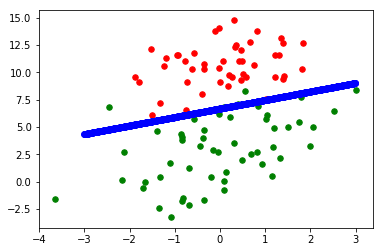

In [278]:
plotBestFit(wei)

In [326]:
#随机梯度下降法
def ranGradascent(dataMat,classLabels):
    m=len(dataMat)
    weight=np.ones(len(dataMat[0]))
    trainrate=0.01
    for i in range(m):
        L=sigmoid(sum(dataMat[i]*weight))
        cost=classLabels[i]-L
        weight=weight+np.tile((trainrate*cost),len(dataMat[0]))*dataMat[i]
    return weight

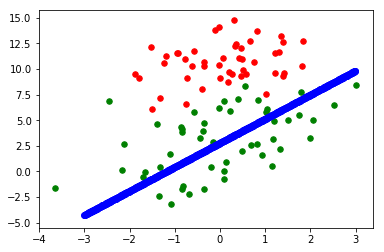

In [327]:
wei2=ranGradascent(dataMat,classLabels)
plotBestFit(wei2)

In [343]:
#改进的随机梯度下降法
def adranGradascent(dataMat,classLabels,iternum=200):
    m=len(dataMat)
    weight=np.ones(len(dataMat[0]))
    for num in range(iternum):
        dataIndex = range(m)
        for i in range(m):
            trainrate=4.0/(num+i+1.0)+0.0001
            randIndex = int(np.random.uniform(0,len(dataIndex)))
            L=sigmoid(sum(dataMat[randIndex]*weight))
            cost=classLabels[randIndex]-L
            weight=weight+np.tile((trainrate*cost),len(dataMat[0]))*dataMat[randIndex]
            del(dataIndex[randIndex])
    return weight

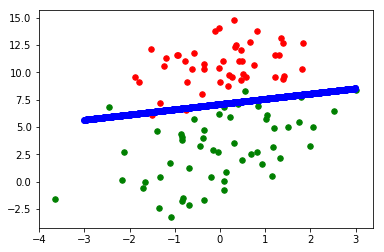

In [344]:
dataMat,classLabels=loadDataSet()
wei3=adranGradascent(dataMat,classLabels)
plotBestFit(wei3)

In [345]:
#logistic分类器
def classify(intvec,weights):
    posible=np.sum(intvec*weights)
    return 1 if posible>0.5 else 0

In [369]:
frTrain=open('horseColicTraining.txt','r')
lines=frTrain.readlines()
trainList=[]
labelList=[]
for line in lines:
    temp=line.strip().split('\t')
    templist=[]
    for i in range(len(temp)-1):
        templist.append(float(temp[i]))
    trainList.append(templist)
    labelList.append(float(temp[-1]))
frTrain.close()
wei=adranGradascent(trainList,labelList,150)
frTest=open('horseColicTest.txt','r')
lines=frTest.readlines()
testList=[]
labelList2=[]
for line in lines:
    temp=line.strip().split('\t')
    templist=[]
    for i in range(len(temp)-1):
        templist.append(float(temp[i]))
    testList.append(templist)
    labelList2.append(float(temp[-1]))
resultList=[0]*len(testList)
for num in range(len(testList)):
    resultList[num]=classify(testList[num],wei)
errornum=0
for item in range(len(resultList)):
    if float(resultList[item])!=labelList2[item]:
        errornum+=1
print u'最终错误率为%s'%str(float(errornum)/len(resultList))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


最终错误率为0.328358208955
